In [ ]:
! wget 'https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_all.zip'

--2021-11-23 03:41:18--  https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_all.zip
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 80.76.166.234
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|80.76.166.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3072270 (2.9M) [application/zip]
Saving to: ‘crisismmd_datasplit_all.zip’

crisismmd_datasplit 100%[===================>]   2.93M  2.27MB/s    in 1.3s    

2021-11-23 03:41:21 (2.27 MB/s) - ‘crisismmd_datasplit_all.zip’ saved [3072270/3072270]



In [ ]:
! unzip './crisismmd_datasplit_all.zip' 

Archive:  ./crisismmd_datasplit_all.zip
   creating: crisismmd_datasplit_all/
  inflating: __MACOSX/._crisismmd_datasplit_all  
  inflating: crisismmd_datasplit_all/task_informative_text_img_train.tsv  
  inflating: __MACOSX/crisismmd_datasplit_all/._task_informative_text_img_train.tsv  
  inflating: crisismmd_datasplit_all/task_damage_text_img_train.tsv  
  inflating: __MACOSX/crisismmd_datasplit_all/._task_damage_text_img_train.tsv  
  inflating: crisismmd_datasplit_all/task_damage_text_img_test.tsv  
  inflating: crisismmd_datasplit_all/task_informative_text_img_test.tsv  
  inflating: __MACOSX/crisismmd_datasplit_all/._task_informative_text_img_test.tsv  
  inflating: crisismmd_datasplit_all/task_damage_text_img_dev.tsv  
  inflating: crisismmd_datasplit_all/task_informative_text_img_dev.tsv  
  inflating: __MACOSX/crisismmd_datasplit_all/._task_informative_text_img_dev.tsv  
  inflating: crisismmd_datasplit_all/task_humanitarian_text_img_test.tsv  
  inflating: __MACOSX/crisismmd_

In [ ]:
import pandas as pd

In [ ]:
df_dev = pd.read_csv('/content/crisismmd_datasplit_all/task_humanitarian_text_img_dev.tsv', sep='\t')
df_test = pd.read_csv('/content/crisismmd_datasplit_all/task_humanitarian_text_img_test.tsv', sep='\t')
df_train = pd.read_csv('/content/crisismmd_datasplit_all/task_humanitarian_text_img_train.tsv', sep='\t')

In [ ]:
df = pd.concat([df_train, df_dev, df_test])

In [ ]:
tmp = df.copy(deep=True)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'affected_individuals' if x=='missing_or_found_people'  else x)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'affected_individuals' if x=='injured_or_dead_people' else x)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'infrastructure_and_utility_damage' if x=='vehicle_damage' else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'affected_individuals' if x=='missing_or_found_people'  else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'affected_individuals' if x=='injured_or_dead_people' else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'infrastructure_and_utility_damage' if x=='vehicle_damage' else x)

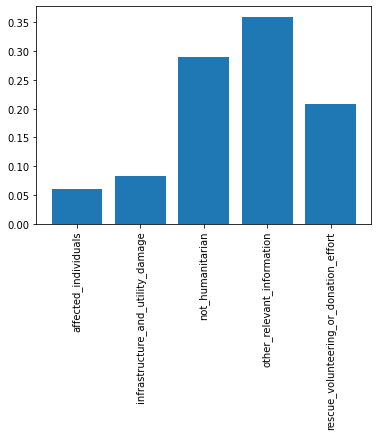

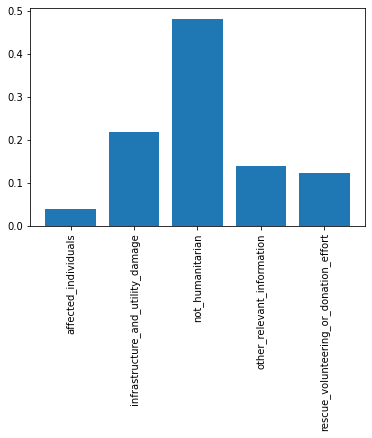

In [ ]:
import matplotlib.pyplot as plt
plt.bar(tmp['label_text'].value_counts().sort_index().index, tmp['label_text'].value_counts(float).sort_index().values)
plt.xticks(rotation='vertical')
plt.show()

plt.bar(tmp['label_image'].value_counts().sort_index().index, tmp['label_image'].value_counts(float).sort_index().values)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
neg = tmp[tmp['label_text_image']=='Negative']
neg['combined'] = neg['label_text']+neg['label_image']
neg = neg[(neg['combined']!='affected_individualsaffected_individuals') & (neg['combined']!='infrastructure_and_utility_damageinfrastructure_and_utility_damage')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
combined = neg.combined.value_counts()
combined.sort_index()

affected_individualsinfrastructure_and_utility_damage                       392
affected_individualsnot_humanitarian                                        311
affected_individualsother_relevant_information                               96
affected_individualsrescue_volunteering_or_donation_effort                  164
infrastructure_and_utility_damageaffected_individuals                        61
infrastructure_and_utility_damagenot_humanitarian                           337
infrastructure_and_utility_damageother_relevant_information                 145
infrastructure_and_utility_damagerescue_volunteering_or_donation_effort     106
not_humanitarianaffected_individuals                                         68
not_humanitarianinfrastructure_and_utility_damage                           441
not_humanitarianother_relevant_information                                  269
not_humanitarianrescue_volunteering_or_donation_effort                      165
other_relevant_informationaffected_indiv

In [ ]:
textimg = df.groupby(by=['tweet_id']).count()['image_id'].rename('len_image')
df = df.join(textimg, on='tweet_id')
df['len_text'] = df['tweet_text'].apply(lambda x: len(x.split()))

In [ ]:
manyimg = df[(df['len_image']>1) & (df['label_text_image']=='Negative')]
# manyimg['agreement'] = 1

disagree = []
for id in manyimg['tweet_id'].unique():
  val = manyimg.iloc[list(manyimg['tweet_id']==id)]['label_image'].value_counts(float).max()
  if val<1:
    # print(id, val)
    disagree.append([id, val])

manyimg = manyimg.join(pd.DataFrame(disagree, columns=['tweet_id', 'agreement']).set_index('tweet_id'), on='tweet_id')

In [ ]:
manyimg['agreement'].fillna(1, inplace=True)
manyimg

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,len_text,len_image,agreement
0,california_wildfires,917791291823591425,917791291823591425_1,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,not_humanitarian,other_relevant_information,not_humanitarian,Negative,13,2,0.5
1,california_wildfires,917791291823591425,917791291823591425_0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,infrastructure_and_utility_damage,Negative,13,2,0.5
5,california_wildfires,917815040962695168,917815040962695168_1,RT @TheAtlantic: Photos of California's destru...,data_image/california_wildfires/10_10_2017/917...,vehicle_damage,infrastructure_and_utility_damage,vehicle_damage,Negative,11,3,0.5
6,california_wildfires,917815040962695168,917815040962695168_0,RT @TheAtlantic: Photos of California's destru...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,rescue_volunteering_or_donation_effort,Negative,11,3,0.5
15,california_wildfires,917832022017445888,917832022017445888_0,RT @Ciscokid__: Calistoga Fire #tubbsfire #nap...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,not_humanitarian,infrastructure_and_utility_damage,Negative,12,4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3159,hurricane_irma,910266304476667906,910266304476667906_0,post hurricane irma clean up ft. dad and a mac...,data_image/hurricane_irma/19_9_2017/9102663044...,infrastructure_and_utility_damage,not_humanitarian,infrastructure_and_utility_damage,Negative,12,2,1.0
3160,hurricane_irma,910266304476667906,910266304476667906_1,post hurricane irma clean up ft. dad and a mac...,data_image/hurricane_irma/19_9_2017/9102663044...,not_humanitarian,not_humanitarian,infrastructure_and_utility_damage,Negative,12,2,1.0
3162,hurricane_irma,910267451664986112,910267451664986112_1,Our @mostateparks crew returned from FL today ...,data_image/hurricane_irma/19_9_2017/9102674516...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,not_humanitarian,Negative,17,4,1.0
3163,hurricane_irma,910267451664986112,910267451664986112_2,Our @mostateparks crew returned from FL today ...,data_image/hurricane_irma/19_9_2017/9102674516...,not_humanitarian,rescue_volunteering_or_donation_effort,not_humanitarian,Negative,17,4,1.0


In [ ]:
manyimg.iloc[list(manyimg['tweet_id']==917791291823591425)]['label_image'].value_counts(float).max()

0.5

In [ ]:
len(df[df.label_text_image=='Positive'])

8079

In [ ]:
tmp = df.copy(deep=True)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'affected_individuals' if x=='missing_or_found_people'  else x)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'affected_individuals' if x=='injured_or_dead_people' else x)
tmp['label_text']=tmp['label_text'].apply(lambda x: 'infrastructure_and_utility_damage' if x=='vehicle_damage' else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'affected_individuals' if x=='missing_or_found_people'  else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'affected_individuals' if x=='injured_or_dead_people' else x)
tmp['label_image']=tmp['label_image'].apply(lambda x: 'infrastructure_and_utility_damage' if x=='vehicle_damage' else x)

In [ ]:
len(tmp[tmp.label_image==tmp.label_text])

8188

In [ ]:
tmp[tmp.label_image==tmp.label_text].label_text.value_counts()

not_humanitarian                          4277
other_relevant_information                1753
rescue_volunteering_or_donation_effort    1187
infrastructure_and_utility_damage          842
affected_individuals                       129
Name: label_text, dtype: int64

# EDA

In [ ]:
df.shape

(18082, 9)

In [ ]:
df.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [ ]:
for col in ['event_name', 'label', 'label_text', 'label_image', 'label_text_image']:
  print(col)
  pc = df[col].value_counts()/df[col].count()
  print(round(pc,2), '\n')

event_name
hurricane_maria         0.25
hurricane_irma          0.25
hurricane_harvey        0.25
california_wildfires    0.09
mexico_earthquake       0.08
srilanka_floods         0.06
iraq_iran_earthquake    0.03
Name: event_name, dtype: float64 

label
not_humanitarian                          0.39
other_relevant_information                0.25
rescue_volunteering_or_donation_effort    0.17
infrastructure_and_utility_damage         0.14
affected_individuals                      0.03
injured_or_dead_people                    0.02
vehicle_damage                            0.01
missing_or_found_people                   0.00
Name: label, dtype: float64 

label_text
other_relevant_information                0.36
not_humanitarian                          0.29
rescue_volunteering_or_donation_effort    0.21
infrastructure_and_utility_damage         0.08
injured_or_dead_people                    0.03
affected_individuals                      0.03
vehicle_damage                            0.00

### Word Cloud

In [ ]:
import re

def clean_tweet(tweet):
    temp = tweet.lower()
    temp = re.sub("'", "", temp)  
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    # temp = re.sub("#[A-Za-z0-9_]+","<HASHTAG>", temp)
    temp = re.sub(r'http\S+', "", temp)
    # temp = temp.replace("rt","<RETWEET>").strip()
    temp = re.sub("[^a-zA-Z0-9]"," ", temp)

    word_tokens = word_tokenize(temp)
    temp = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words])

    return temp

text = df.copy(deep=True)
text = text[['tweet_id', 'tweet_text', 'label_text']]
text = text.drop_duplicates(['tweet_id']).drop(columns=['tweet_id'])
text['tweet_text'] = text['tweet_text'].apply(lambda x: clean_tweet(x))

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

from wordcloud import WordCloud

NameError: ignored

In [ ]:
all_text = ' '.join(text['tweet_text'])
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, max_words=50,
                     background_color='white', collocations=False).generate(all_text)

plot_cloud(wordcloud)

In [ ]:
wordcloud.words_.keys()

In [ ]:
excludels=['irma', 'hurricane', 'harvey', 'puerto', 'rt', 'rico', 'maria', 'earthquake', 'california', 'mexico', 'wildfire',
           'storm', 'mora', 'fire', 'florida', 'hurricanemaria','tornado', 'texas', 'houston', 'hurricaneharvey', 'amp', 'iran', 'iraq',
           'srilanka', 'flood']

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
for cat in text['label_text'].unique():
  all_text = ' '.join(text[text['label_text']==cat]['tweet_text'])
  wordcloud = WordCloud(width= 600, height = 700, random_state=1, max_words=10,
                     background_color='white', collocations=False, stopwords=excludels).generate(all_text)
  print(cat)
  plot_cloud(wordcloud)   

# Preprocess

In [ ]:
df_text = df.copy(deep=True)
df_text = df_text[['tweet_id', 'tweet_text', 'label_text']]
df_text.head(3)

,tweet_id,tweet_text,label_text
0,917791291823591425,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,other_relevant_information
1,917791291823591425,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,other_relevant_information
2,917793137925459968,RT @KAKEnews: California wildfires destroy mor...,infrastructure_and_utility_damage


In [ ]:
df_text.duplicated().sum()

2024

In [ ]:
df_text = df_text.drop_duplicates(['tweet_id']).drop(columns=['tweet_id'])

In [ ]:
# df_text['label_text']=df_text['label_text'].apply(lambda x: 'affected_individuals' if x=='missing_or_found_people' else x)
# df_text['label_text']=df_text['label_text'].apply(lambda x: 'affected_individuals' if x=='injured_or_dead_people' else x)
# df_text['label_text']=df_text['label_text'].apply(lambda x: 'infrastructure_and_utility_damage' if x=='vehicle_damage' else x)

In [ ]:
# todrop = df_text[df_text['label_text']=='other_relevant_information'].sample(frac=0.2, axis=0, random_state=0)
# df_text = df_text.drop(index=todrop.index)

In [ ]:
for col in ['label_text']:
  print(col)
  pc = df_text[col].value_counts()/df_text[col].count()
  print(round(pc,2), '\n')

label_text
other_relevant_information                0.37
not_humanitarian                          0.28
rescue_volunteering_or_donation_effort    0.21
infrastructure_and_utility_damage         0.08
injured_or_dead_people                    0.03
affected_individuals                      0.03
vehicle_damage                            0.00
missing_or_found_people                   0.00
Name: label_text, dtype: float64 



# Clean

#### Extract hashtags
not much gained from presence of hashtags, but perhaps should not remove the hastags(words) since they are often trending/identifying keywords 

In [ ]:
import numpy as np
import re

In [ ]:
hashtags = df_text.copy(deep=True)
hashtags['tweet_text'] = hashtags['tweet_text'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
hashtags = hashtags.rename(columns={'tweet_text':'tags'})
hashtags['has_tags'] = hashtags['tags'].apply(lambda x: 1 if len(x)>0 else 0)

In [ ]:
hashtags.groupby(by=['label_text']).mean()

#### Apply custom cleaning function

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import re 

def clean_tweet(tweet):
    temp = tweet.lower()
    temp = re.sub("'", "", temp)  
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    # temp = re.sub("@[A-Za-z0-9_]+","<MENTION>", temp)
    # temp = re.sub("#[A-Za-z0-9_]+","<HASHTAG>", temp)
    # temp = re.sub(r'http\S+', "<LINK>", temp)
    # temp = temp.replace("\brt\b","<RETWEET>").strip()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', "", temp)
    temp = re.sub(r'\brt\b',"", temp).strip()
    temp = re.sub("[^a-zA-Z0-9]"," ", temp)

    word_tokens = word_tokenize(temp)
    temp = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words])

    return temp

In [ ]:
df_text['tweet_text'] = df_text['tweet_text'].apply(lambda x: clean_tweet(x))

In [ ]:
df_text['tweet_text'].unique()

array(['pls share capturing wildfire response recovery info',
       'california wildfire destroy 50 structure kakenews',
       'photo california destructive wildfire via', ...,
       'marathonfl sunken boat lay side irma floridastrong',
       'harvey damage could reach 180 billion',
       'maria want work irma couldnt completely 3 4'], dtype=object)

8.58743305517499 24 9


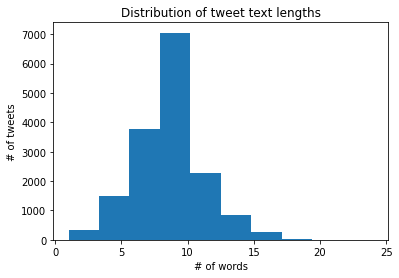

In [ ]:
import matplotlib.pyplot as plt

tweet_lens = df_text['tweet_text'].apply(lambda x: len(x.split()))
plt.hist(tweet_lens)
plt.xlabel("# of words")
plt.ylabel("# of tweets")
plt.title("Distribution of tweet text lengths")
print(tweet_lens.mean(), tweet_lens.max(), tweet_lens.mode()[0])

# Word Embedding

In [ ]:
%%time
import gensim.downloader
from gensim.models import Word2Vec

wv = gensim.downloader.load('glove-twitter-100')
wv.init_sims(replace=True)
print('Model loaded')


[==================================================] 100.0% 387.1/387.1MB downloaded
Model loaded
CPU times: user 4min 20s, sys: 16.5 s, total: 4min 37s
Wall time: 5min 2s


In [ ]:
import numpy as np
def word_averaging(wv, words):
    # averages a set of words 'words' given their wordvectors 'wv'
    
    all_words, mean = set(), []
    
    # for each word in the list of words
    for word in words:
        # if the words are already vectors, then just append them
        if isinstance(word, np.ndarray):
            mean.append(word)
        # if not: first get the vector embedding for the words
        elif word in wv.vocab:
            mean.append(wv.vectors_norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    
    if not mean:
        # error handling in case mean cannot be calculated
        print("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    # use gensim's method to calculate the mean of all the words appended to mean list
    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_text, test_size=0.2, random_state = 42)

test_tokenized = test.apply(lambda r: r['tweet_text'].split(), axis=1).values
train_tokenized = train.apply(lambda r:  r['tweet_text'].split(), axis=1).values

In [ ]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

cannot compute similarity with no input %s ['2016', 'graffitiart']
cannot compute similarity with no input %s ['dryair', 'entrained', 'hurricanelee', 'hurricanemaria', 'continentalairmass']


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1, max_iter=350, random_state=0)
logreg = logreg.fit(X_train_word_average, train['label_text'])
y_pred = logreg.predict(X_test_word_average)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('accuracy %s' % accuracy_score(y_pred, test['label_text']))
print(classification_report(test['label_text'], y_pred))

accuracy 0.6226650062266501
                                        precision    recall  f1-score   support

                  affected_individuals       0.62      0.34      0.44       196
     infrastructure_and_utility_damage       0.54      0.24      0.33       255
                      not_humanitarian       0.64      0.62      0.63       941
            other_relevant_information       0.58      0.71      0.64      1192
rescue_volunteering_or_donation_effort       0.70      0.70      0.70       628

                              accuracy                           0.62      3212
                             macro avg       0.62      0.52      0.55      3212
                          weighted avg       0.62      0.62      0.61      3212



# Classify

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_text['tweet_text'], df_text['label_text'], 
                                                    random_state = 0, stratify=df_text['label_text'])

### Cross-validation

In [ ]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=8, random_state=0),
    MultinomialNB(),
    LogisticRegression(max_iter=250, random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

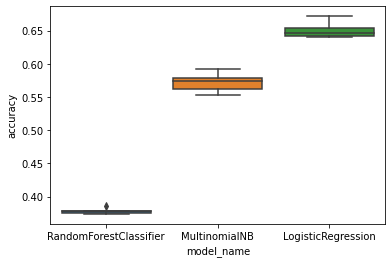

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.650751
MultinomialNB             0.572448
RandomForestClassifier    0.378228
Name: accuracy, dtype: float64

### Simple Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif

pipeline = Pipeline([
    ('TF-IDF', TfidfVectorizer(use_idf=True, stop_words='english')),
    ('LogisticRegression', LogisticRegression(max_iter=250, random_state=0))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
c = y_test.value_counts()
print(c)
labels = c.keys().sort_values()

other_relevant_information                1489
not_humanitarian                          1137
rescue_volunteering_or_donation_effort     823
infrastructure_and_utility_damage          303
injured_or_dead_people                     122
affected_individuals                       118
vehicle_damage                              13
missing_or_found_people                     10
Name: label_text, dtype: int64


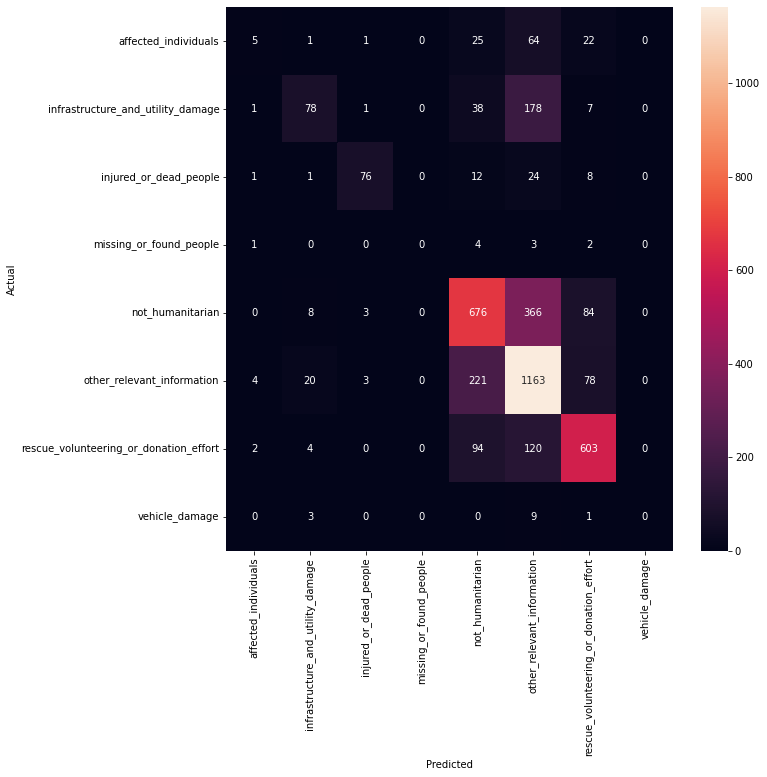

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
# sns.heatmap(conf_mat/conf_mat.sum(1), annot=True, fmt='.2f',
#             xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=labels, zero_division=0))

                                        precision    recall  f1-score   support

                  affected_individuals       0.36      0.04      0.08       118
     infrastructure_and_utility_damage       0.68      0.26      0.37       303
                injured_or_dead_people       0.90      0.62      0.74       122
               missing_or_found_people       0.00      0.00      0.00        10
                      not_humanitarian       0.63      0.59      0.61      1137
            other_relevant_information       0.60      0.78      0.68      1489
rescue_volunteering_or_donation_effort       0.75      0.73      0.74       823
                        vehicle_damage       0.00      0.00      0.00        13

                              accuracy                           0.65      4015
                             macro avg       0.49      0.38      0.40      4015
                          weighted avg       0.65      0.65      0.63      4015



### NN

In [ ]:
corpus = ' '.join(df_text['tweet_text']).split()
corpus = set(corpus)
print(len(corpus))

17470


https://cnvrg.io/cnn-sentence-classification/  
https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 10000

X_train_nn = [one_hot(d, vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test_nn = [one_hot(d, vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 30
X_train_nn = pad_sequences(X_train_nn, maxlen=max_length, padding='post')
X_test_nn = pad_sequences(X_test_nn, maxlen=max_length, padding='post')

In [ ]:
X_train_nn[0]

array([3293,  979, 5212, 5190,  367,  861,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_nn = le.fit_transform(y_train)
y_test_nn = le.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train_nn = to_categorical(y_train_nn)
y_test_nn = to_categorical(y_test_nn)

In [ ]:
y_test_nn

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D, Dropout
from tensorflow.keras.models import Sequential

embed_dim = 8
num_classes = len(labels)

model = Sequential([
                    Embedding(vocab_size, embed_dim, input_length=max_length),
                    Conv1D(128, 5, activation='relu'),
                    GlobalMaxPooling1D(),
                    Dense(10, activation='relu'),
                    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 30, 8)             80000     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 26, 128)           5248      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
Total params: 86,626
Trainable params: 86,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00015), loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

In [ ]:
history = model.fit(X_train_nn, y_train_nn, epochs=10, validation_split=0.2)

Epoch 1/10
302/302 [==============================] - 2s 6ms/step - loss: 1.7758 - categorical_accuracy: 0.3109 - val_loss: 1.5505 - val_categorical_accuracy: 0.3574
Epoch 2/10
302/302 [==============================] - 2s 5ms/step - loss: 1.5217 - categorical_accuracy: 0.3741 - val_loss: 1.4989 - val_categorical_accuracy: 0.3574
Epoch 3/10
302/302 [==============================] - 2s 5ms/step - loss: 1.4629 - categorical_accuracy: 0.3913 - val_loss: 1.4127 - val_categorical_accuracy: 0.4288
Epoch 4/10
302/302 [==============================] - 2s 6ms/step - loss: 1.3554 - categorical_accuracy: 0.4815 - val_loss: 1.3050 - val_categorical_accuracy: 0.5413
Epoch 5/10
302/302 [==============================] - 2s 5ms/step - loss: 1.2594 - categorical_accuracy: 0.5696 - val_loss: 1.2387 - val_categorical_accuracy: 0.5720
Epoch 6/10
302/302 [==============================] - 2s 5ms/step - loss: 1.1824 - categorical_accuracy: 0.6183 - val_loss: 1.1859 - val_categorical_accuracy: 0.5924
Epoc

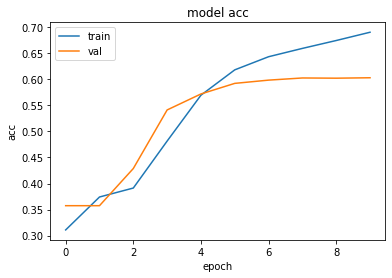

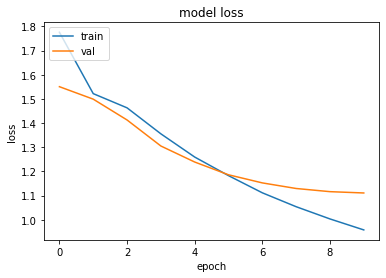

In [ ]:
# summarize history for acc
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test_nn, y_test_nn)

126/126 [==============================] - 0s 2ms/step - loss: 1.1299 - categorical_accuracy: 0.6045


# Examine results

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_pred = pipeline.predict_proba(X_test)
roc_auc_score(y_test, y_prob_pred, multi_class='ovr', average='weighted')

0.8643811434723794

In [ ]:
y_test_codes = pd.Categorical(y_test).codes

0 affected_individuals 0.8888301735798506
1 infrastructure_and_utility_damage 0.9074938474450895
2 injured_or_dead_people 0.9761383399375929
3 missing_or_found_people 0.890461922596754
4 not_humanitarian 0.8391884144601053
5 other_relevant_information 0.8212397646079165
6 rescue_volunteering_or_donation_effort 0.9392889118300003
7 vehicle_damage 0.9712451466574406


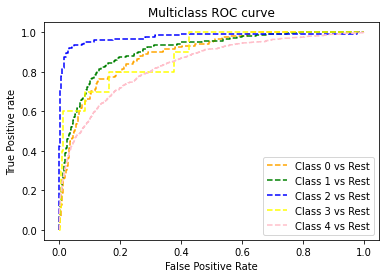

In [ ]:
# roc curve for classes
fpr,tpr,thresh={},{},{}

n_class = 8

for i in range(8):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_codes, y_prob_pred[:,i], pos_label=i)
    print(i, labels[i], np.trapz(tpr[i],fpr[i]))
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 4 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
def see_misclassified(feat, actual, pred):
  dfidx = feat.index

In [ ]:
df_compare = pd.concat([X_test, y_test], axis=1)
df_compare['pred_text'] = y_pred
df_compare['match'] = df_compare['label_text']==df_compare['pred_text']
df_compare.head()

,tweet_text,label_text,pred_text,match
9729,hurricane irma recovery day 7 day 8 approximat...,infrastructure_and_utility_damage,other_relevant_information,False
5265,bvi b c repost MENTION MENTION experience hurr...,not_humanitarian,other_relevant_information,False
8475,please support gofundme campaign harveykittens...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,True
978,opinion hurricane maria need reconstitute LINK...,other_relevant_information,other_relevant_information,True
6126,cu aid hurricaneharvey make donation visit LIN...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,True


In [ ]:
df_compare[(df_compare['match']==False) & (df_compare['label_text']=='affected_individuals') & (df_compare['pred_text']=='other_relevant_information')]

,tweet_text,label_text,pred_text,match
3912,federal prisoner stranded harvey harris county...,affected_individuals,other_relevant_information,False
7975,150 nigerian medical student currently strande...,affected_individuals,other_relevant_information,False
19,rt MENTION deadly california wildfire force th...,affected_individuals,other_relevant_information,False
10083,hurricane irma richard branson family survive ...,affected_individuals,other_relevant_information,False
3410,joy amp jerry sleeping crushed stock island ho...,affected_individuals,other_relevant_information,False
...,...,...,...,...
5393,hurricane harvey wreckage photo resident face ...,affected_individuals,other_relevant_information,False
4161,rt MENTION picture edit umbrella upside hurric...,affected_individuals,other_relevant_information,False
824,rt MENTION survived survive hurricaneharvey LINK,affected_individuals,other_relevant_information,False
8920,houston resident battle harvey next wave fraud...,affected_individuals,other_relevant_information,False


In [ ]:
df_acc = df_compare.groupby(by=['label_text']).match.aggregate(['sum', 'count'])
df_acc['label_acc'] = df_acc['sum']/4015
df_acc['label_pc'] = df_acc['count']/4015
df_acc

,sum,count,label_acc,label_pc
label_text,,,,
affected_individuals,5,118,0.001245,0.029390
infrastructure_and_utility_damage,74,303,0.018431,0.075467
injured_or_dead_people,76,122,0.018929,0.030386
missing_or_found_people,0,10,0.000000,0.002491
not_humanitarian,667,1137,0.166127,0.283188
other_relevant_information,1178,1489,0.293400,0.370859
rescue_volunteering_or_donation_effort,605,823,0.150685,0.204981
vehicle_damage,0,13,0.000000,0.003238


# Temporary section

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
! unzip '/content/humanitarian_SMALL_5classes_withFusion.zip'
df_fusion = pd.read_csv('/content/humanitarian_SMALL_5classes_withFusion.tsv', sep='\t')

Archive:  /content/humanitarian_SMALL_5classes_withFusion.zip
  inflating: humanitarian_SMALL_5classes_withFusion.tsv  


In [ ]:
label_order = df_fusion.codeorder_label_text.values[0][1:-1].replace("'", "").split(',')
label_dict = {}
for i in range(len(label_order)):
  label_dict[label_order[i].strip()] = i

print(label_dict)

{'infrastructure_and_utility_damage': 0, 'other_relevant_information': 1, 'not_humanitarian': 2, 'rescue_volunteering_or_donation_effort': 3, 'affected_individuals': 4}


In [ ]:
df_fusion.drop(index=955, inplace=True)

In [ ]:
true_vals = [label_dict[l] for l in df_fusion.label_text.values]
pred_add_vals = [label_dict[l] for l in df_fusion.label_add.values]
pred_max_vals = [label_dict[l] for l in df_fusion.label_max.values]
labels = list(label_dict.keys())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_confmat(y_true, y_pred, labels):
  conf_mat = confusion_matrix(y_true, y_pred)

  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=labels, yticklabels=labels)

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

                                        precision    recall  f1-score   support

     infrastructure_and_utility_damage     0.9545    0.5185    0.6720        81
            other_relevant_information     0.8786    0.7702    0.8209       235
                      not_humanitarian     0.7769    0.9325    0.8476       504
rescue_volunteering_or_donation_effort     0.7700    0.6111    0.6814       126
                  affected_individuals     0.0000    0.0000    0.0000         9

                              accuracy                         0.8063       955
                             macro avg     0.6760    0.5665    0.6044       955
                          weighted avg     0.8087    0.8063    0.7962       955



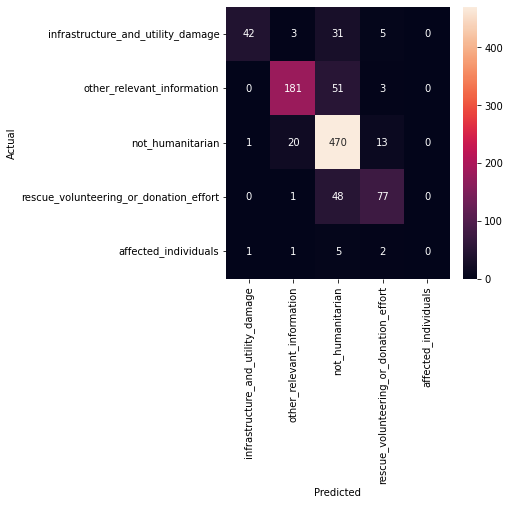

In [ ]:
print(classification_report(true_vals, pred_add_vals, target_names=list(label_dict.keys()), zero_division=0, digits=4))
show_confmat(true_vals, pred_add_vals, labels)

                                        precision    recall  f1-score   support

     infrastructure_and_utility_damage     0.9286    0.4815    0.6341        81
            other_relevant_information     0.8696    0.7660    0.8145       235
                      not_humanitarian     0.7802    0.9226    0.8455       504
rescue_volunteering_or_donation_effort     0.7182    0.6270    0.6695       126
                  affected_individuals     0.0000    0.0000    0.0000         9

                              accuracy                         0.7990       955
                             macro avg     0.6593    0.5594    0.5927       955
                          weighted avg     0.7992    0.7990    0.7887       955



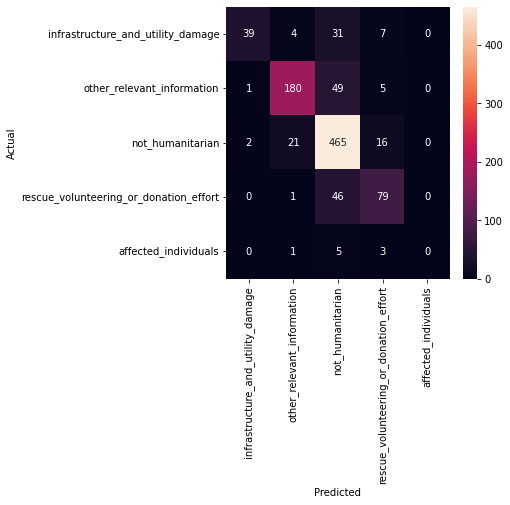

In [ ]:
print(classification_report(true_vals, pred_max_vals, target_names=list(label_dict.keys()), zero_division=0, digits=4))
show_confmat(true_vals, pred_max_vals, labels)

                                        precision    recall  f1-score   support

     infrastructure_and_utility_damage     0.6111    0.1358    0.2222        81
            other_relevant_information     0.7277    0.6596    0.6920       235
                      not_humanitarian     0.6636    0.8492    0.7450       504
rescue_volunteering_or_donation_effort     0.4051    0.2540    0.3122       126
                  affected_individuals     0.0000    0.0000    0.0000         9

                              accuracy                         0.6555       955
                             macro avg     0.4815    0.3797    0.3943       955
                          weighted avg     0.6345    0.6555    0.6235       955



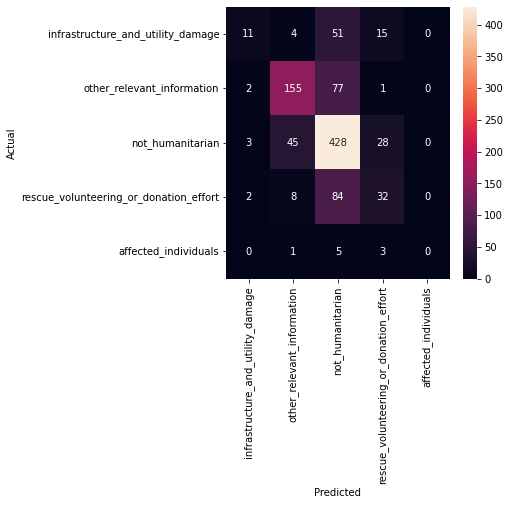

In [ ]:
pred_img_vals = [label_dict[l] for l in df_fusion.pred_label_img.values]
print(classification_report(true_vals, pred_img_vals, target_names=list(label_dict.keys()), zero_division=0, digits=4))
show_confmat(true_vals, pred_img_vals, labels)

                                        precision    recall  f1-score   support

     infrastructure_and_utility_damage     0.7403    0.7037    0.7215        81
            other_relevant_information     0.8250    0.7021    0.7586       235
                      not_humanitarian     0.8250    0.8889    0.8558       504
rescue_volunteering_or_donation_effort     0.7185    0.7698    0.7433       126
                  affected_individuals     0.0000    0.0000    0.0000         9

                              accuracy                         0.8031       955
                             macro avg     0.6218    0.6129    0.6158       955
                          weighted avg     0.7960    0.8031    0.7976       955



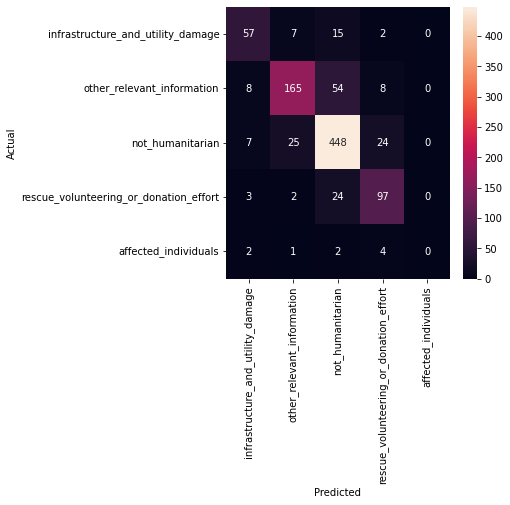

In [ ]:
pred_text_vals = [label_dict[l] for l in df_fusion.pred_label_text.values]
print(classification_report(true_vals, pred_text_vals, target_names=list(label_dict.keys()), zero_division=0, digits=4))
show_confmat(true_vals, pred_text_vals, labels)